In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import quad
import scipy.special as sc
from scipy.integrate import odeint
import utility as psu
import scipy.integrate as integ
from scipy.optimize import curve_fit
from scipy import stats
import time
from matplotlib.colors import LogNorm
from numpy.random import randn
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
import os
import process_abalone_utility as pau

/data/abalone/ABALONE_RampingUp/2021_08_03_T1051_ABALONE_15kV_SiPM2_32V_LED350V.dat Number of events 594960.0
Total events number: 594960
event n. 0 time to process: 0.02
event n. 100000 time to process: 12.52
event n. 200000 time to process: 25.12
event n. 300000 time to process: 37.68
event n. 400000 time to process: 50.71
event n. 500000 time to process: 64.12


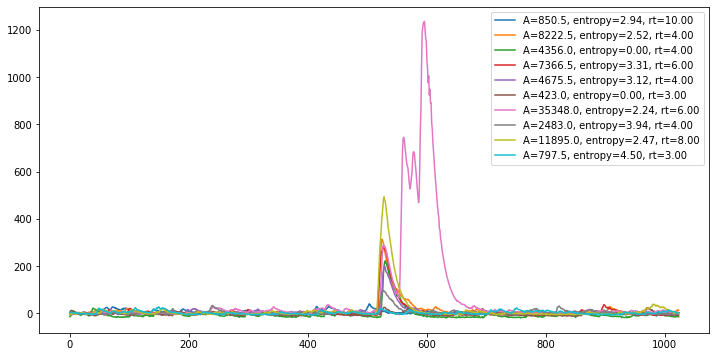

In [2]:
file_LED = '/data/abalone/ABALONE_RampingUp/2021_08_03_T1051_ABALONE_15kV_SiPM2_32V_LED350V.dat'
dataLED = pau.process_abalone_data(filename=file_LED,nn=0,nplot=10,w=10)

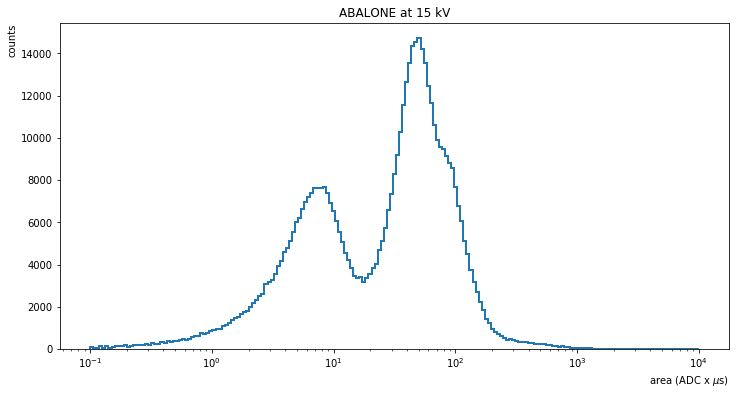

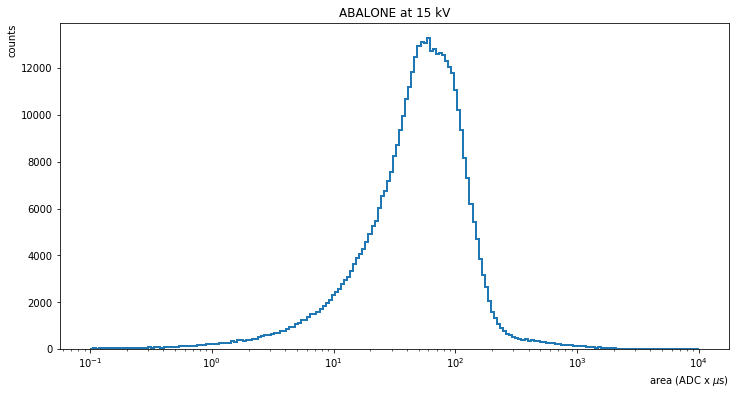

<Figure size 864x432 with 0 Axes>

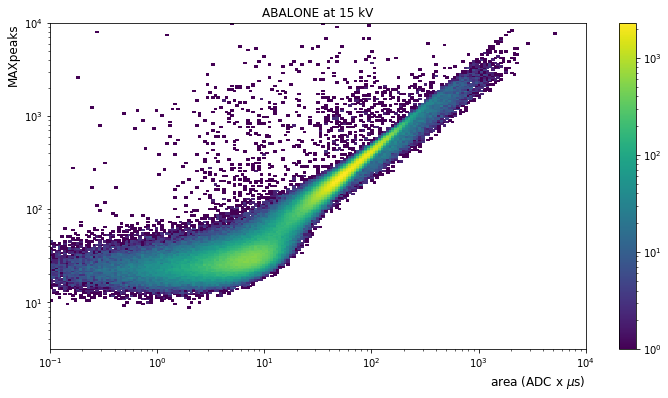

<Figure size 864x432 with 0 Axes>

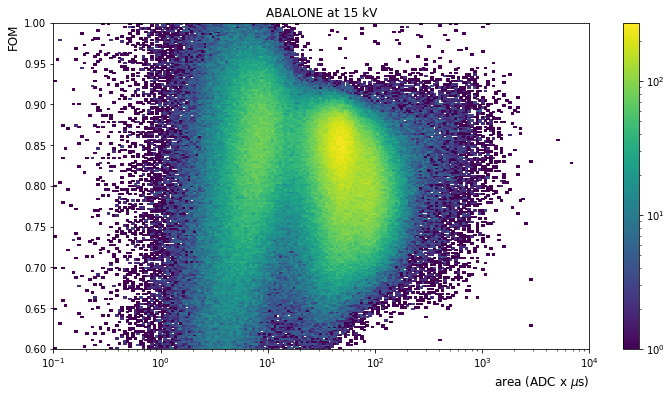

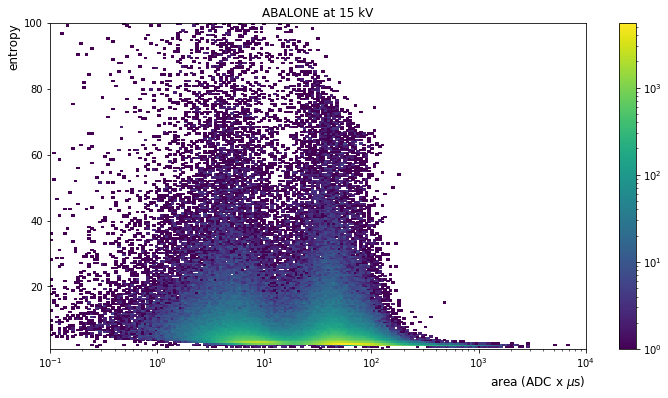

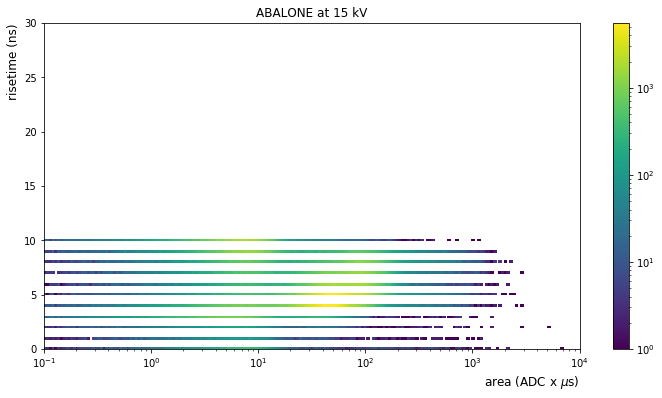

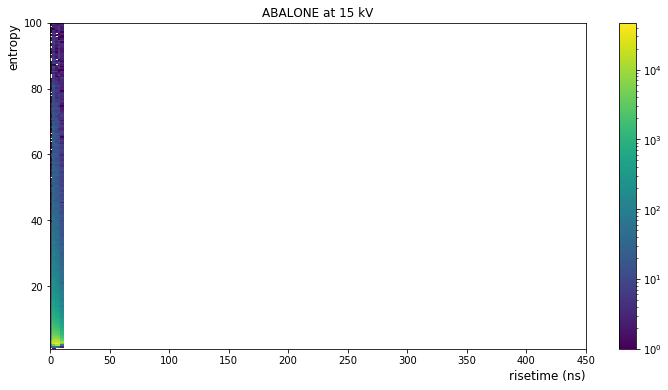

In [3]:
pau.plot_data(data=dataLED,fvolt=15,low=-1, high=4,low_max=0.5,high_max=4,low_en=1, high_en=100,
              low_fom=0.6,high_fom=1,high_rt=30)

/data/abalone/ABALONE_RampingUp/2021_08_03_T1051_ABALONE_15kV_SiPM2_32V_LED350V.dat Number of events 594960.0
n. events 0 waveform samples 1024
Events rejected by areaup 0 -> 0.0 %

n. events 46493 waveform samples 1024
Events rejected by areadown 46493 -> 7.814474922683878 %

n. events 0 waveform samples 1024
Events rejected by entropy 0 -> 0.0 %

n. events 0 waveform samples 1024
Events rejected by max 0 -> 0.0 %

n. events 116 waveform samples 1024
Events rejected by risetime 116 -> 0.019497109049347854 %

n. events 229120 waveform samples 1024
Events rejected by max position 229120 -> 38.51015194298776 %

n. events 309290 waveform samples 1024
Events selected  309290 -> 51.98500739545515 %


<Figure size 864x432 with 0 Axes>

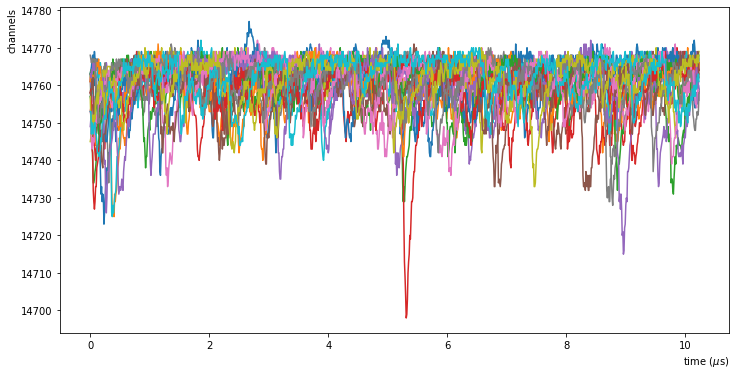

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

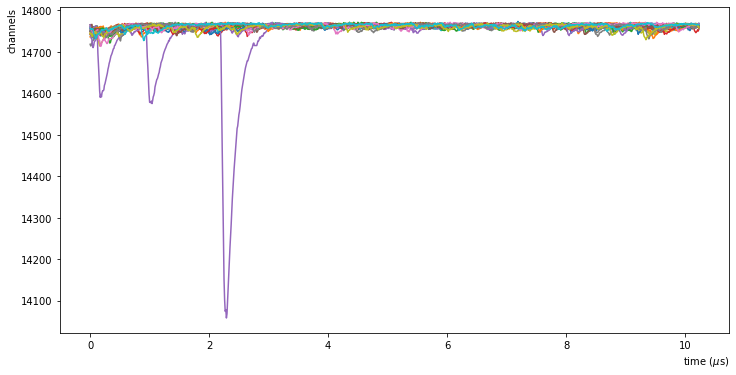

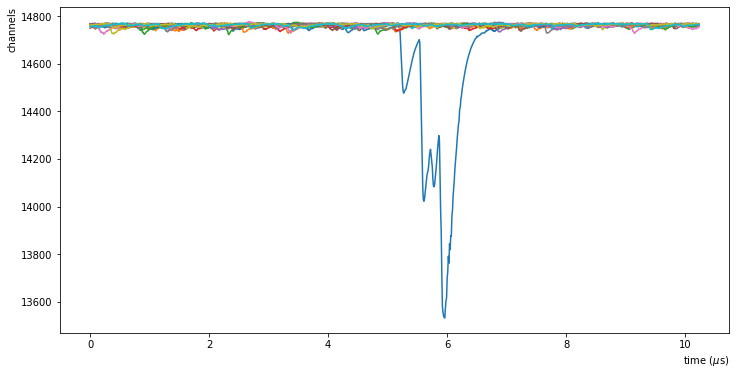

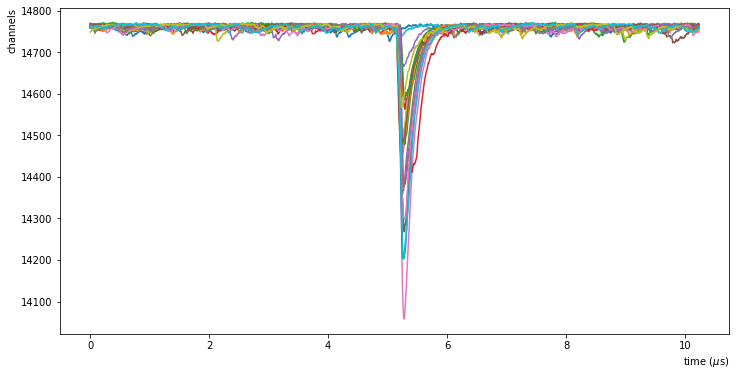

In [4]:
new_data, new_wf = pau.select_data(dataLED,filename=file_LED,fvolt=15,entr_cut=200,
                                  max_cut=1,area_cut=(0,1e7), pos_cut=(500,550),rt_cut=0,events=20)

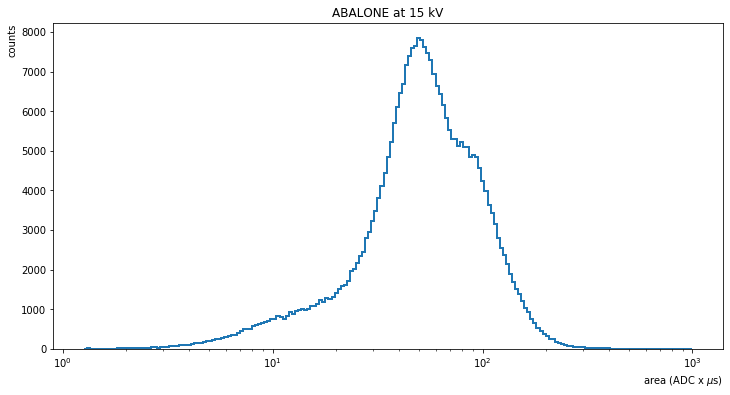

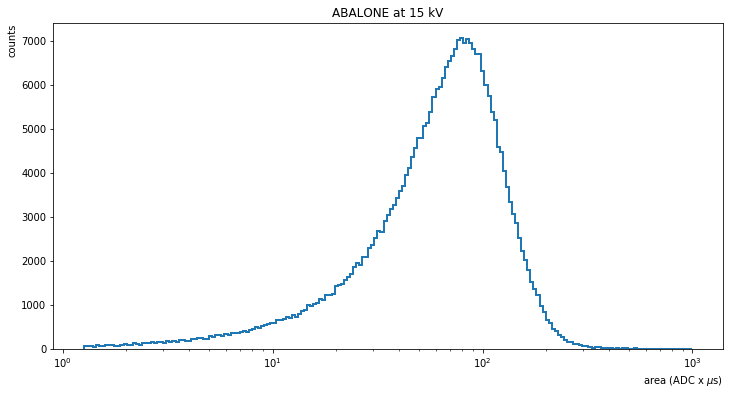

<Figure size 864x432 with 0 Axes>

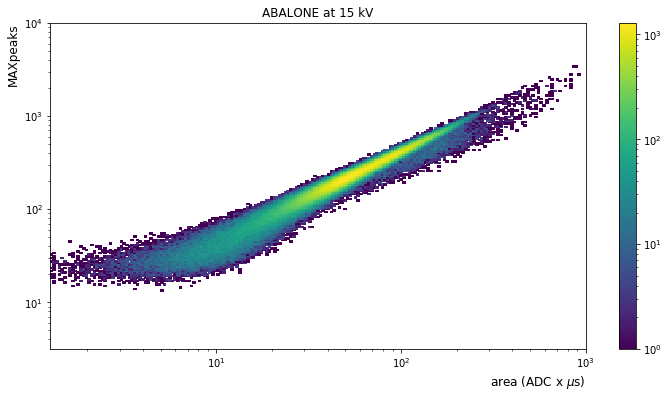

<Figure size 864x432 with 0 Axes>

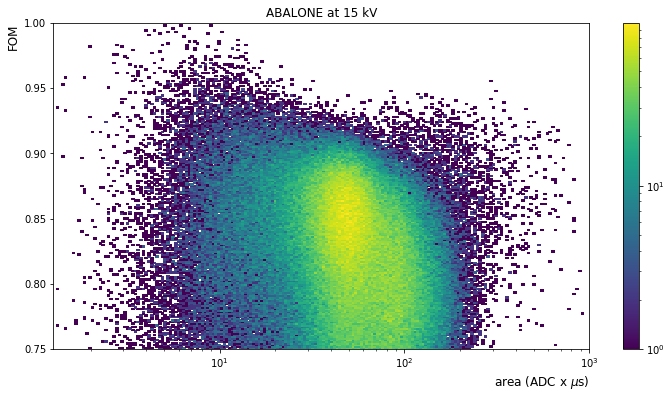

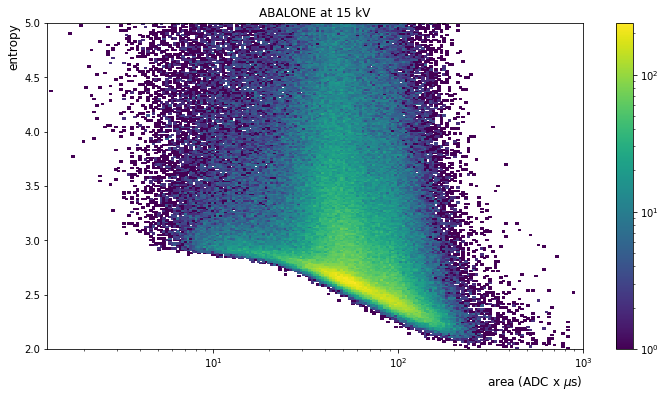

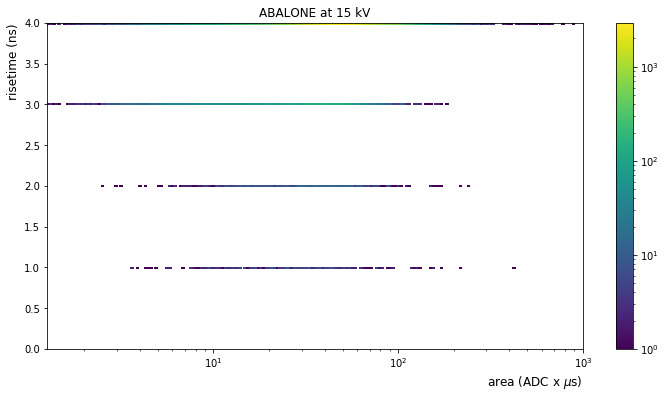

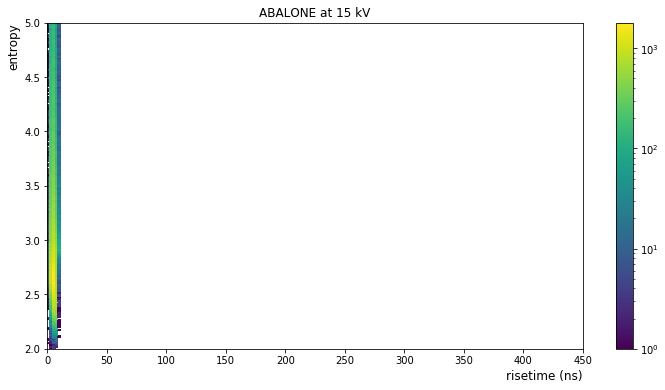

In [5]:
pau.plot_data(data=new_data,fvolt=15,low=0.1, high=3,low_max=0.5,high_max=4,low_en=2, high_en=5,
          low_fom=0.75,high_fom=1)

n. events 68447 waveform samples 1024


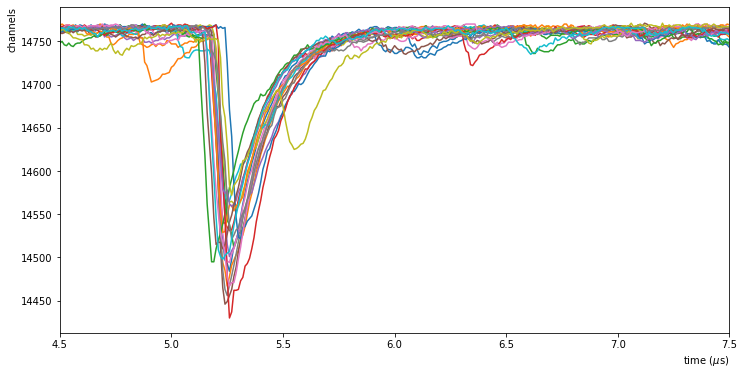

In [6]:
wf2 = new_wf[(new_data['area']>50)&(new_data['area']<70)]
psu.plot_waveforms( wf2,events=20,tlim=(4.5,7.5))

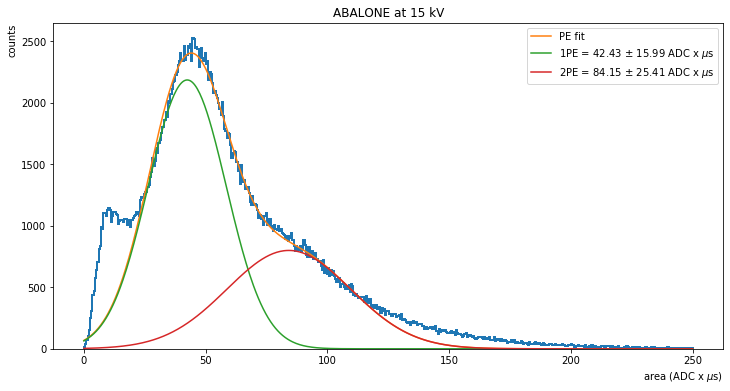

In [10]:
popt = pau.fit_pe_spectrum(new_data['area'],volts = 15,low=0, high=250, bins=500,fit_range=(20,120),dpe=1)

In [11]:
popt[1]/1.113

38.125218991788365

In [17]:
peakint = np.load('processed_data/peakint_ABALONE_15kV_SiPM2_32V_LED_3p5V.npy')
#peakint = pau.calculate_integrals( new_wf, nn = 0, volts = 15, sipmv = 32, ledv = '3p5', plot = 0, save = 1)

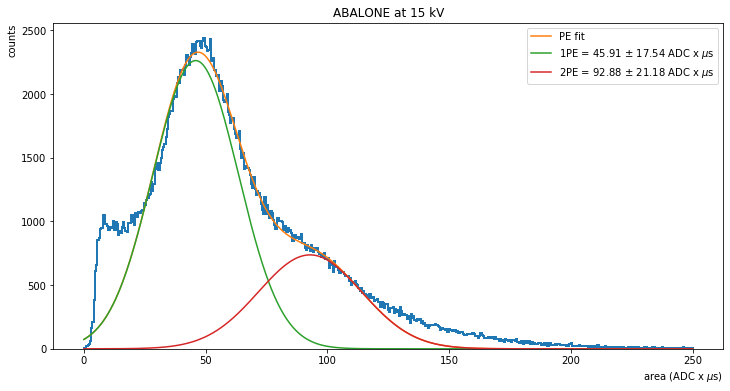

In [18]:
popt = pau.fit_pe_spectrum(peakint,volts = 15,low=0, high=250, bins=500,fit_range=(20,120),dpe=1)

In [11]:
popt[1]/1.113

50.23418376329527